In [2]:
import pandas as pd
import glob

files = ["2020.csv", "2021.csv", "2022.csv", "2023.csv", "2024.csv"]

dataframes = []
for file in files:
    year = file.split('.')[0]

    df = pd.read_csv(file)

    df['Year'] = int(year)

    dataframes.append(df)

merged_df = pd.concat(dataframes, ignore_index=True)

print(merged_df.head())
print(merged_df.info())
print(merged_df.shape)

merged_df.to_csv("world_happiness_2020_2024_merged.csv", index=False)


  Country name  Happiness Rank  Happiness score  Upperwhisker  Lowerwhisker  \
0      Finland               1             7.81          7.87          7.75   
1      Denmark               2             7.65          7.71          7.58   
2  Switzerland               3             7.56          7.63          7.49   
3      Iceland               4             7.50          7.62          7.39   
4       Norway               5             7.49          7.56          7.42   

   Economy (GDP per Capita)\t  Social support  Healthy life expectancy  \
0                        1.29            1.50                     0.96   
1                        1.33            1.50                     0.98   
2                        1.39            1.47                     1.04   
3                        1.33            1.55                     1.00   
4                        1.42            1.50                     1.01   

   Freedom to make life choices  Generosity  Perceptions of corruption  Year  
0

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

file_path = "world_happiness_2020_2024_merged.csv"
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip().str.replace('"', '')

print(df.head())
print(df.info())
print(df.describe())

features = [
    'Happiness score', 'Economy (GDP per Capita)', 'Social support',
    'Healthy life expectancy', 'Freedom to make life choices',
    'Generosity', 'Perceptions of corruption'
]

df = df.dropna(subset=features)

scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

cleaned_file_path = "world_happiness_2020_2024_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)



  Country name  Happiness Rank  Happiness score  Upperwhisker  Lowerwhisker  \
0      Finland               1             7.81          7.87          7.75   
1      Denmark               2             7.65          7.71          7.58   
2  Switzerland               3             7.56          7.63          7.49   
3      Iceland               4             7.50          7.62          7.39   
4       Norway               5             7.49          7.56          7.42   

   Economy (GDP per Capita)  Social support  Healthy life expectancy  \
0                      1.29            1.50                     0.96   
1                      1.33            1.50                     0.98   
2                      1.39            1.47                     1.04   
3                      1.33            1.55                     1.00   
4                      1.42            1.50                     1.01   

   Freedom to make life choices  Generosity  Perceptions of corruption  Year  
0            

In [4]:
import pandas as pd
cleaned_file_path = "world_happiness_2020_2024_cleaned.csv"
df = pd.read_csv(cleaned_file_path)
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  724 non-null    object 
 1   Happiness Rank                724 non-null    int64  
 2   Happiness score               724 non-null    float64
 3   Upperwhisker                  724 non-null    float64
 4   Lowerwhisker                  724 non-null    float64
 5   Economy (GDP per Capita)      724 non-null    float64
 6   Social support                724 non-null    float64
 7   Healthy life expectancy       724 non-null    float64
 8   Freedom to make life choices  724 non-null    float64
 9   Generosity                    724 non-null    float64
 10  Perceptions of corruption     724 non-null    float64
 11  Year                          724 non-null    int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 68.0+ KB


,Happiness Rank,Happiness score,Upperwhisker,Lowerwhisker,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,73.320442,0.621667,5.641975,5.410506,0.543425,0.633584,0.474761,0.610094,0.285451,0.245212,2021.946133
std,42.318585,0.182360,1.097604,1.136059,0.214759,0.205794,0.196431,0.180878,0.156021,0.207260,1.418559
min,1.000000,0.000000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000
25%,37.000000,0.497672,4.888500,4.640500,0.397239,0.500309,0.333333,0.498262,0.173684,0.102215,2021.000000
50%,73.000000,0.632495,5.699500,5.489500,0.561340,0.659877,0.487281,0.635574,0.260526,0.187394,2022.000000
75%,110.000000,0.752982,6.433750,6.218500,0.695450,0.792438,0.616667,0.740440,0.377193,0.306644,2023.000000
max,153.000000,1.000000,7.904000,7.780000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2024.000000



✅ Fuzzy Partition Coefficient (FPC): 0.7424

🏆 Top 5 Countries per Cluster based on Membership Strength:

Cluster 0:
Country name  Year  Cluster_0_Membership  Happiness score
Burkina Faso  2022              0.998481         0.481784
    Liberia*  2022              0.996004         0.555628
        Togo  2024              0.994843         0.407286
        Chad  2024              0.994777         0.449273
Burkina Faso  2024              0.994033         0.461853

Cluster 1:
Country name  Year  Cluster_1_Membership  Happiness score
     Ecuador  2024              0.997147         0.654141
     Jamaica  2022              0.993505         0.674563
    Paraguay  2022              0.992590         0.630126
  Kazakhstan  2021              0.990523         0.723901
   Mauritius  2022              0.990078         0.710668

Cluster 2:
  Country name  Year  Cluster_2_Membership  Happiness score
       Germany  2024              0.997489         0.816533
        Canada  2022              0.997412

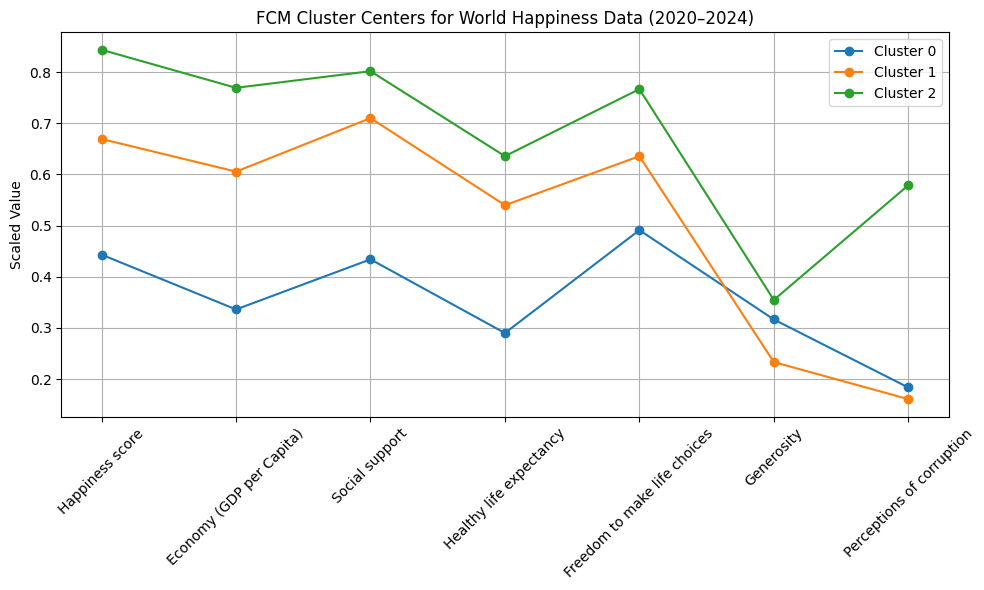

In [2]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

cleaned_file_path = "world_happiness_2020_2024_cleaned.csv"
df = pd.read_csv(cleaned_file_path)

features = [
    'Happiness score', 'Economy (GDP per Capita)', 'Social support',
    'Healthy life expectancy', 'Freedom to make life choices',
    'Generosity', 'Perceptions of corruption'
]

X = df[features].values.T   

n_clusters = 3  
m_val = 1.5   

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X, c=n_clusters, m=m_val, error=0.005, maxiter=1000, init=None
)

print(f"\n Fuzzy Partition Coefficient (FPC): {fpc:.4f}")

df['Cluster'] = np.argmax(u, axis=0)
df['Max_Membership'] = np.max(u, axis=0)

for i in range(n_clusters):
    df[f'Cluster_{i}_Membership'] = u[i]

print("\n Top 5 Countries per Cluster based on Membership Strength:")
for i in range(n_clusters):
    top_countries = (
        df[df['Cluster'] == i]
        .sort_values(by=f'Cluster_{i}_Membership', ascending=False)
        [['Country name', 'Year', f'Cluster_{i}_Membership', 'Happiness score']]
        .head(5)
    )
    print(f"\nCluster {i}:")
    print(top_countries.to_string(index=False))

plt.figure(figsize=(10,6))
for i in range(n_clusters):
    plt.plot(cntr[i], marker='o', label=f'Cluster {i}')
plt.xticks(range(len(features)), features, rotation=45)
plt.ylabel("Scaled Value")
plt.title("FCM Cluster Centers for World Happiness Data (2020–2024)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

country_evolution = (
    df.groupby(['Country name', 'Year'])
      [[f'Cluster_{i}_Membership' for i in range(n_clusters)]]
      .mean()
      .reset_index()
)

country_evolution['Dominant_Cluster'] = country_evolution[
    [f'Cluster_{i}_Membership' for i in range(n_clusters)]
].idxmax(axis=1).apply(lambda x: int(x.split('_')[1]))




✅ Generating custom 3 scatter plots in a 3x2 grid...
💾 Grid saved successfully as: cluster_grid.jpg


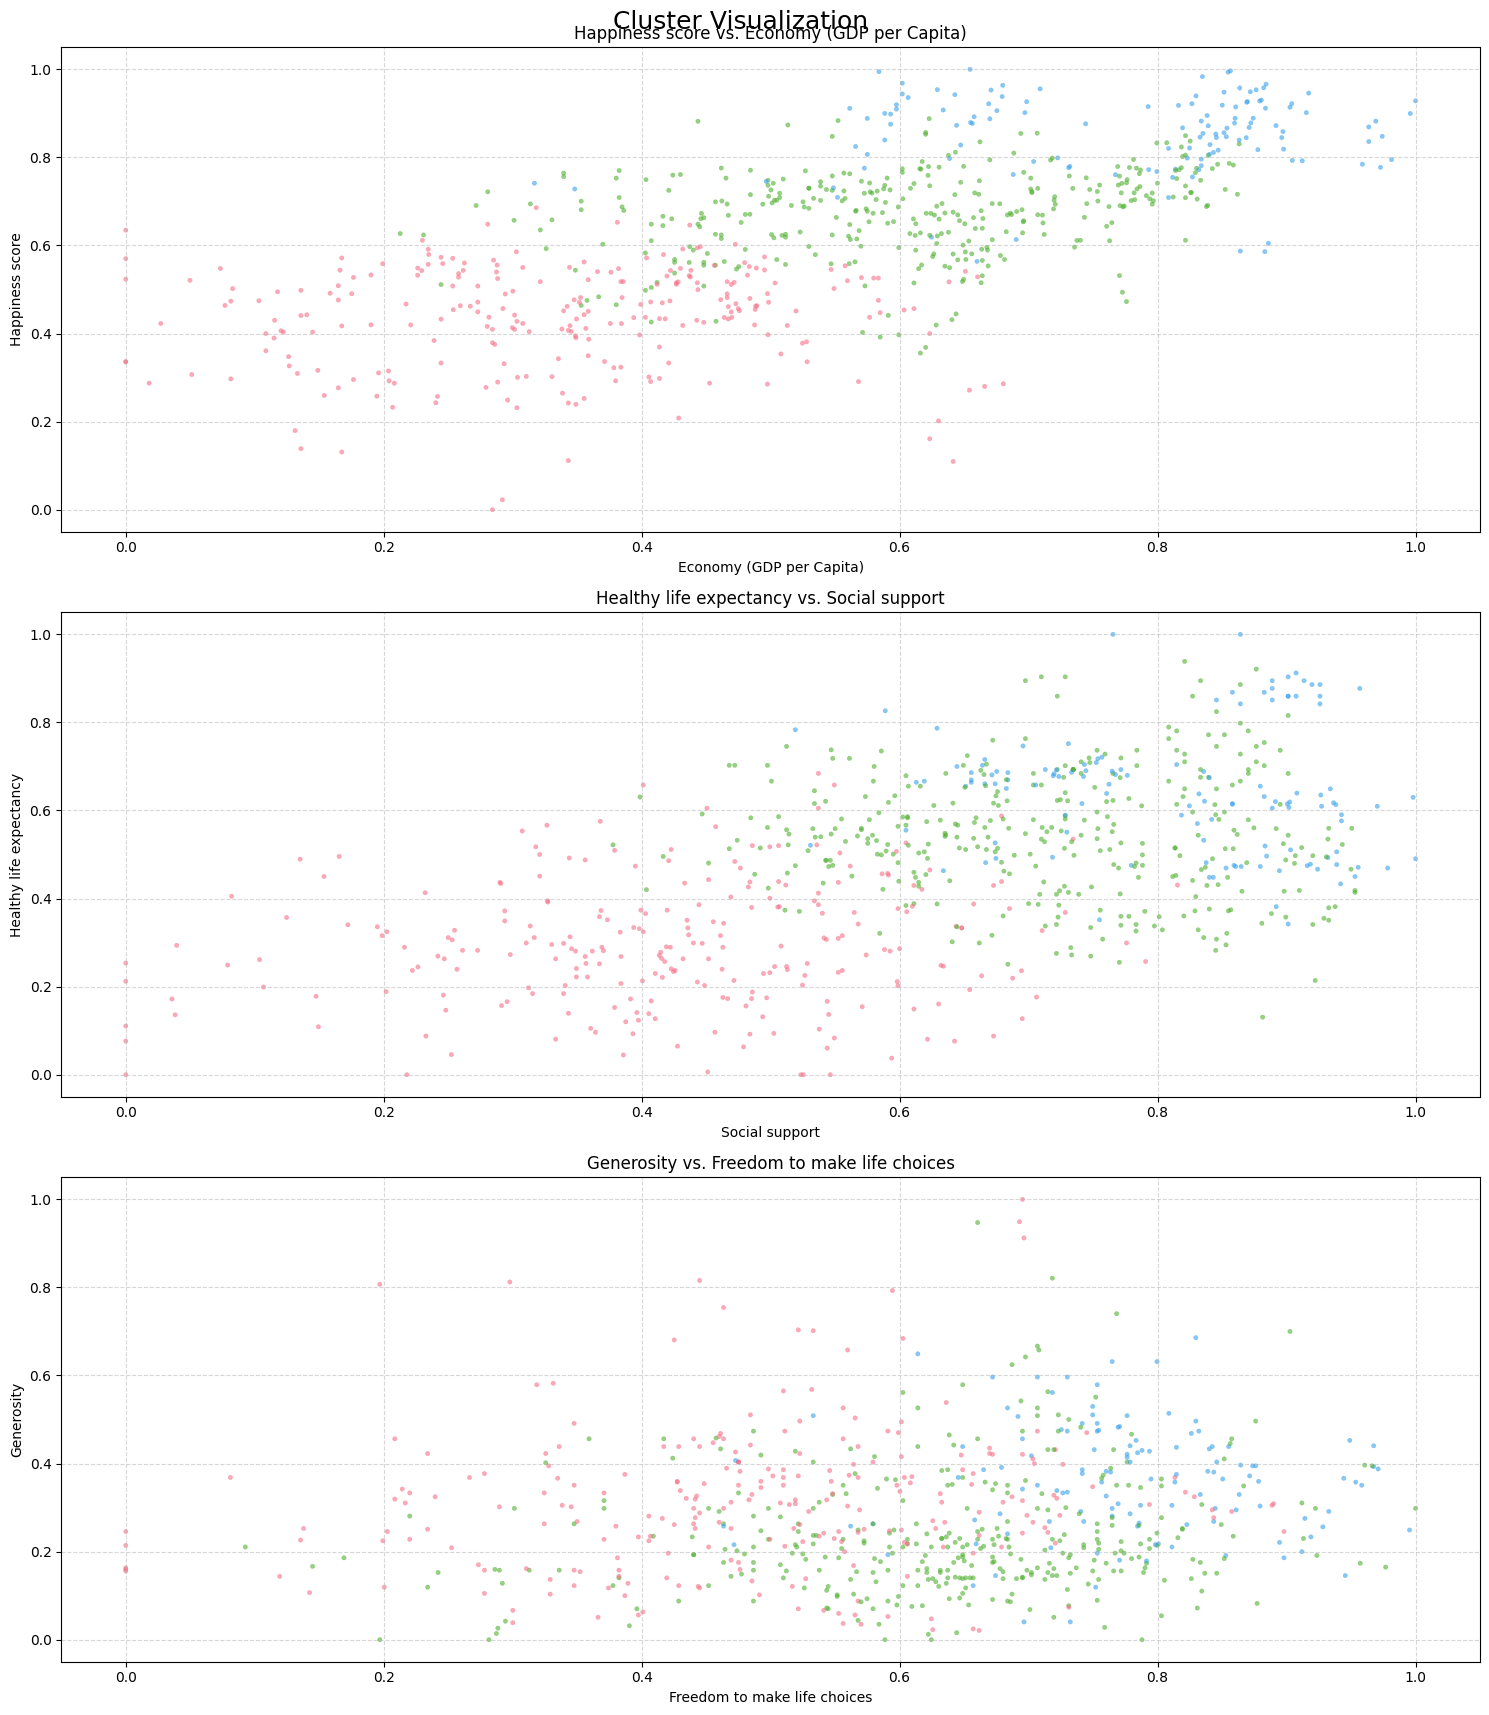

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

if 'u' not in locals():
    raise ValueError(" 'u' (membership matrix) not found.")

df['Cluster'] = np.argmax(u, axis=0)

if 'n_clusters' not in locals():
    n_clusters = u.shape[0]

feature_pairs = [
    ('Economy (GDP per Capita)', 'Happiness score'),
    ('Social support', 'Healthy life expectancy'),
    ('Freedom to make life choices', 'Generosity'),

]

fig, axes = plt.subplots(3, 1, figsize=(15, 18))
axes = axes.flatten()

print(f"Generating custom {len(feature_pairs)} scatter plots in a 3x2 grid...")

palette = sns.color_palette('husl', n_colors=n_clusters)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for i, (x_feat, y_feat) in enumerate(feature_pairs):
    ax = axes[i]
    sns.scatterplot(
        data=df,
        x=x_feat,
        y=y_feat,
        hue='Cluster',
        palette=palette,
        ax=ax,
        s=10,
        alpha=0.6,
        edgecolor=None,
        legend=False
    )

  

    ax.set_title(f'{y_feat} vs. {x_feat}', fontsize=12)
    ax.set_xlabel(x_feat, fontsize=10)
    ax.set_ylabel(y_feat, fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.suptitle(f'Cluster Visualization ', fontsize=18)

output_path = "cluster_grid.jpg"
plt.savefig(output_path, format='jpg', dpi=300, bbox_inches='tight')
print(f" {output_path}")

plt.show()


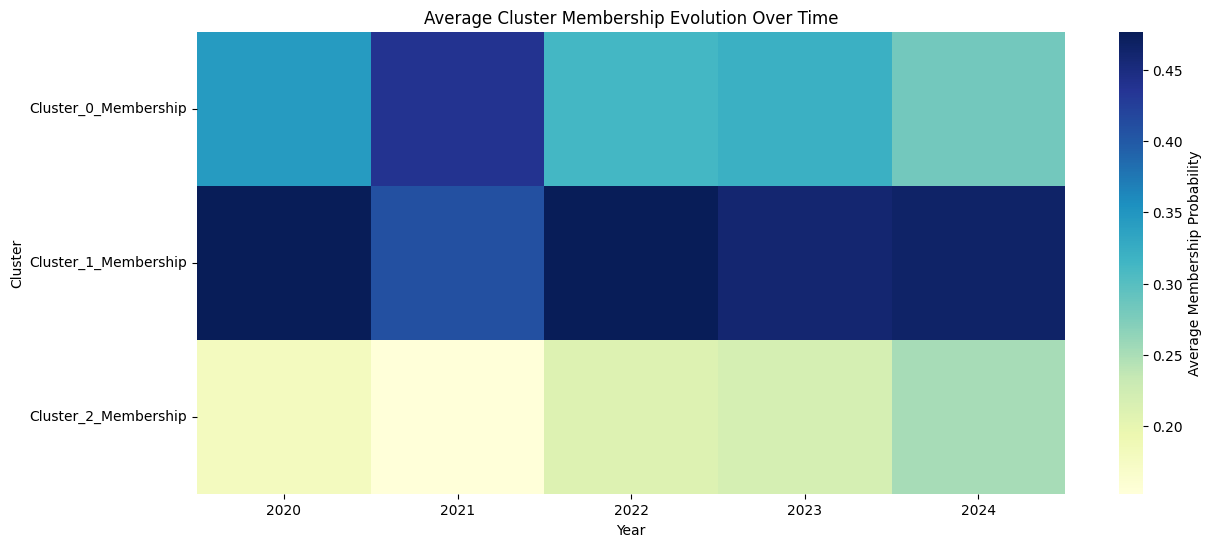

In [7]:
membership_long = country_evolution.melt(
    id_vars=['Country name', 'Year'],
    value_vars=[f'Cluster_{i}_Membership' for i in range(n_clusters)],
    var_name='Cluster', value_name='Membership'
)

plt.figure(figsize=(14,6))
sns.heatmap(
    membership_long.pivot_table(index='Cluster', columns='Year', values='Membership', aggfunc='mean'),
    cmap='YlGnBu', cbar_kws={'label': 'Average Membership Probability'}
)
plt.title("Average Cluster Membership Evolution Over Time")
plt.xlabel("Year")
plt.ylabel("Cluster")
plt.show()


📊 Generating Stacked Bar Chart for Cluster Counts...


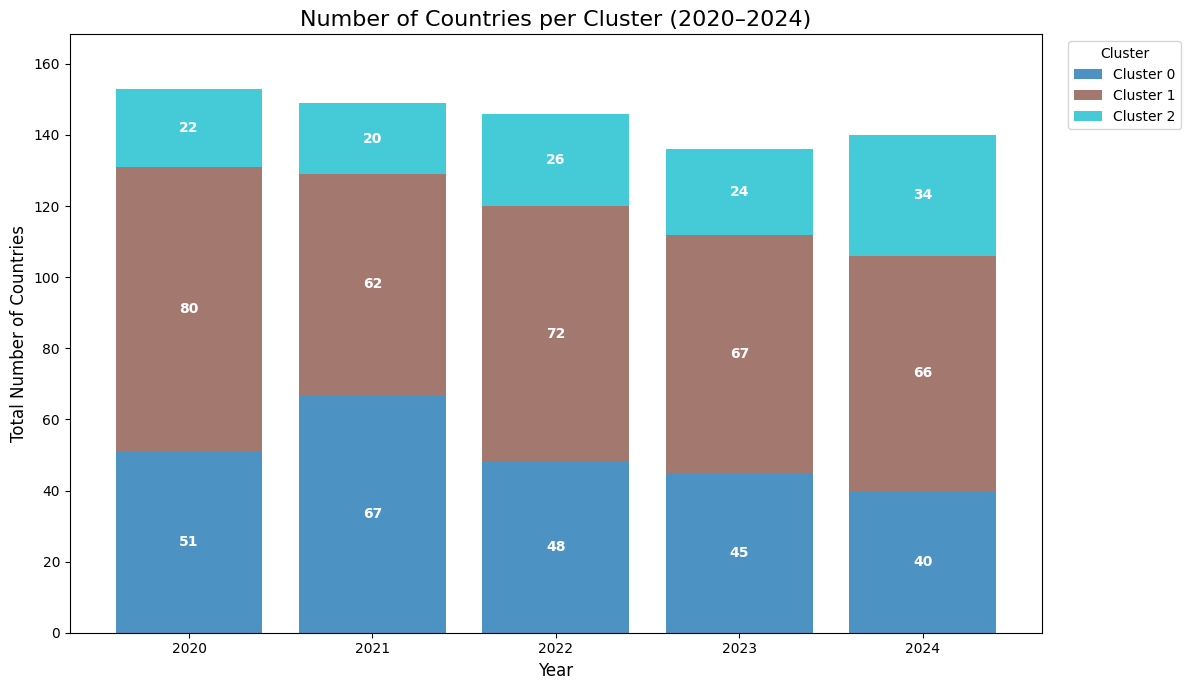

In [6]:
cluster_counts_over_time = pd.crosstab(
    country_evolution['Year'], 
    country_evolution['Dominant_Cluster']
)

cluster_counts_over_time.columns = [f'Cluster {col}' for col in cluster_counts_over_time.columns]

cmap = plt.get_cmap('tab10', n_clusters)
colors = [cmap(i) for i in range(n_clusters)]

ax = cluster_counts_over_time.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    color=colors,
    alpha=0.8,
    width=0.8  
)

for c in ax.containers:
    labels = [int(v.get_height()) if v.get_height() > 3 else '' for v in c] 
    
    ax.bar_label(
        c, 
        labels=labels,
        label_type='center', 
        color='white', 
        fontweight='bold',
        fontsize=10
    )

ax.set_title(f'Number of Countries per Cluster ({cluster_counts_over_time.index.min()}–{cluster_counts_over_time.index.max()})', fontsize=16)
ax.set_ylabel('Total Number of Countries', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
plt.xticks(rotation=0) 
plt.legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')

ax.set_ylim(0, cluster_counts_over_time.sum(axis=1).max() * 1.1) 

plt.tight_layout()
plt.savefig("cluster_counts_over_time.jpeg", dpi=300, bbox_inches='tight')
plt.show()

Clusters: 3, Fuzziness m: 2.0, FPC: 0.4864
Clusters: 3, Fuzziness m: 1.9, FPC: 0.5243
Clusters: 3, Fuzziness m: 1.8, FPC: 0.5692
Clusters: 3, Fuzziness m: 1.7, FPC: 0.6211
Clusters: 3, Fuzziness m: 1.6, FPC: 0.6794
Clusters: 3, Fuzziness m: 1.5, FPC: 0.7424
Clusters: 4, Fuzziness m: 2.0, FPC: 0.3903
Clusters: 4, Fuzziness m: 1.9, FPC: 0.4212
Clusters: 4, Fuzziness m: 1.8, FPC: 0.4588
Clusters: 4, Fuzziness m: 1.7, FPC: 0.5042
Clusters: 4, Fuzziness m: 1.6, FPC: 0.5582
Clusters: 4, Fuzziness m: 1.5, FPC: 0.6214
Clusters: 5, Fuzziness m: 2.0, FPC: 0.3161
Clusters: 5, Fuzziness m: 1.9, FPC: 0.3428
Clusters: 5, Fuzziness m: 1.8, FPC: 0.3771
Clusters: 5, Fuzziness m: 1.7, FPC: 0.4204
Clusters: 5, Fuzziness m: 1.6, FPC: 0.4756
Clusters: 5, Fuzziness m: 1.5, FPC: 0.5448
Clusters: 6, Fuzziness m: 2.0, FPC: 0.2636
Clusters: 6, Fuzziness m: 1.9, FPC: 0.2868
Clusters: 6, Fuzziness m: 1.8, FPC: 0.3160
Clusters: 6, Fuzziness m: 1.7, FPC: 0.3542
Clusters: 6, Fuzziness m: 1.6, FPC: 0.4132
Clusters: 6

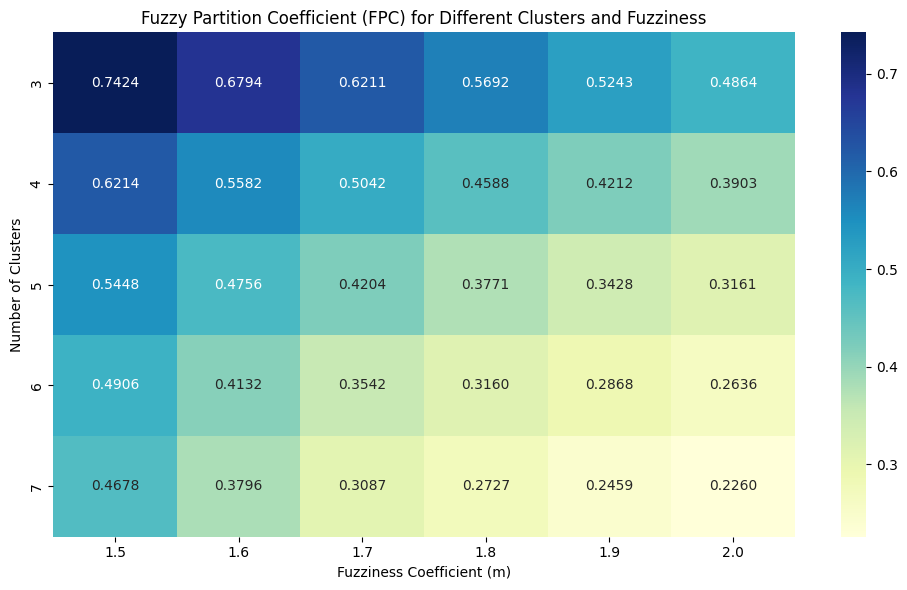

In [8]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_file_path = "world_happiness_2020_2024_cleaned.csv"
df = pd.read_csv(cleaned_file_path)

features = [
    'Happiness score', 'Economy (GDP per Capita)', 'Social support',
    'Healthy life expectancy', 'Freedom to make life choices',
    'Generosity', 'Perceptions of corruption'
]

X = df[features].values.T 

m_values = [2.0, 1.9, 1.8, 1.7, 1.6, 1.5]
cluster_values = [3, 4, 5, 6, 7]

results = []

for c in cluster_values:
    for m_val in m_values:
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            X, c=c, m=m_val, error=0.005, maxiter=1000, init=None
        )
        print(f"Clusters: {c}, Fuzziness m: {m_val}, FPC: {fpc:.4f}")
        results.append({'Clusters': c, 'Fuzziness': m_val, 'FPC': fpc})

results_df = pd.DataFrame(results)

heatmap_data = results_df.pivot(index="Clusters", columns="Fuzziness", values="FPC")

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Fuzzy Partition Coefficient (FPC) for Different Clusters and Fuzziness")
plt.ylabel("Number of Clusters")
plt.xlabel("Fuzziness Coefficient (m)")
plt.tight_layout()
plt.show()
